In [3]:
%pwd # 현재 위치

'C:\\Users\\tmznq\\workspace\\ml_scratch\\seoul_coding_academy\\week2'

#### pandas data 호출

In [3]:
import numpy as np
import pandas as pd

In [4]:
path = 'C:/Users/tmznq/workspace/ml_scratch/dataset/titanic/train.csv'
df = pd.read_csv(path)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# 정렬
# 색인, 계층적 색인
# 통계값 구하기
# 상관계수

### 1. sorting
- Pclass에 따른 정렬

In [6]:
# df에서 'Pclass' col에 의한 정렬
df.sort_values(by = 'Pclass')[:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
445,446,1,1,"Dodge, Master. Washington",male,4.0,0,2,33638,81.8583,A34,S
310,311,1,1,"Hays, Miss. Margaret Bechstein",female,24.0,0,0,11767,83.1583,C54,C
309,310,1,1,"Francatelli, Miss. Laura Mabel",female,30.0,0,0,PC 17485,56.9292,E36,C
307,308,1,1,"Penasco y Castellana, Mrs. Victor de Satode (M...",female,17.0,1,0,PC 17758,108.9000,C65,C
306,307,1,1,"Fleming, Miss. Margaret",female,NaN,0,0,17421,110.8833,NaN,C


In [7]:
# df에서 2가지 col에 의한 정렬 + 1개는 오름차순, 1개는 내림차순
df.sort_values(by = ['Pclass', 'Age'], ascending = [True, False])[:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
456,457,0,1,"Millet, Mr. Francis Davis",male,65.0,0,0,13509,26.5500,E38,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
545,546,0,1,"Nicholson, Mr. Arthur Ernest",male,64.0,0,0,693,26.0000,NaN,S
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
252,253,0,1,"Stead, Mr. William Thomas",male,62.0,0,0,113514,26.5500,C87,S


In [8]:
# df의 1개의 col에대해 Series로 접근 (2가지 동일한 표현)
# 주의 할 점 : Series로 부를 시 2가지 이상 col에 대해 DataFrame형식으로 접근할 수 없다.
df.Pclass[:5]
df['Pclass'][:5]

0    3
1    1
2    3
3    1
4    3
Name: Pclass, dtype: int64

### 2. 요금의 min, max
- Fare의 최솟값, 최댓값 구하기.

In [9]:
# Series에 접근해서 min(), max() 구하기
print(df.Fare.max(), df.Fare.min())

512.3292 0.0


In [10]:
# Series에 접근해서 descibe()
df.Fare.describe()
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [11]:
# df에 접근해서 describe() / 마찬가지로 min, max 동일하게 사용가능
df[['Pclass']].describe()

,Pclass
count,891.000000
mean,2.308642
std,0.836071
min,1.000000
25%,2.000000
50%,3.000000
75%,3.000000
max,3.000000


### 3. Pclass에 따른 생존여부
- 여러 그래프로 표현하기

In [12]:
# 목표 1 : 'Pclass' col과 'Survived' col 연결해서 만들면 됨.

In [13]:
# 1. Grouping

In [14]:
by_sur_Pcl = df.groupby(['Survived', 'Pclass']) # 두 개의 col이 가진 size가 같으므로 grouping이 가능한 것!
by_sur_Pcl

In [15]:
# 2. size() 
by_sur_Pcl.size() 

Survived  Pclass
0         1          80
          2          97
          3         372
1         1         136
          2          87
          3         119
dtype: int64

- Grouping만으로도 대략적인 비교가 가능함

In [50]:
# 3. unstack
result = by_sur_Pcl.size().unstack() # ?_?
result

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [17]:
# 목표 2 : 여러가지 모양의 그래프로 표현해보기 

In [24]:
import matplotlib.pyplot as plt # 시각화 패키지 부르고.
plt.figure(figsize=(10, 4)) # 그림(figure)이 들어갈 공간 생성.

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

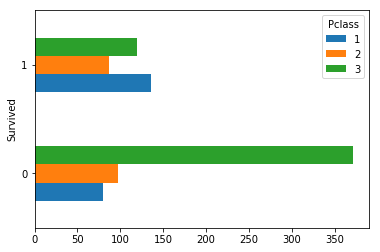

In [86]:
result.plot(kind='barh', rot=0)  # barh : bar shape horizon, rot : rotation 회전각

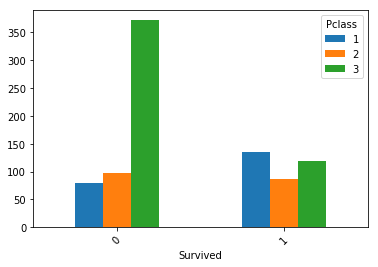

In [84]:
result.plot(kind='bar', rot=45)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000022F8384FBA8>,
      dtype=object)

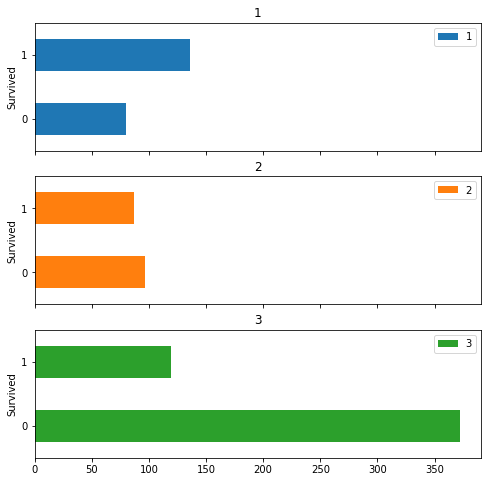

In [85]:
result.plot(kind='barh', subplots=True, rot=0, figsize=(8,8))

### kind of graph
    - 'bar' : vertical bar plot
    - 'barh' : horizontal bar plot
    - 'hist' : histogram
    - 'box' : boxplot
    - 'kde' : Kernel Density Estimation plot
    - 'density' : same as 'kde'm
    - 'area' : area plot
    - 'pie' : pie plot
    - 'scatter' : scatter plot
    - 'hexbin' : hexbin plot

### 4. 성별에 따른 생존 여부
- 여러 그래프로 표현하기

In [12]:
# 목표 1 : 'Sex' col과 'Survived' col 연결해서 만들면 됨.

In [45]:
# 1. Grouping

by_sur_S = df.groupby(['Survived', 'Sex'])
by_sur_S

In [46]:
# 2. size() 
by_sur_S.size()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
dtype: int64

- Grouping만으로도 대략적인 비교가 가능함

In [70]:
# 3. unstack
result2 = by_sur_S.size().unstack() # ?_?
result2.sort_values()

Sex,female,male
Survived,,
0,81,468
1,233,109


In [60]:
# 남자와 여자의 전체 수가 다르기 때문에 눈에 보이는 절대적인 값을 비교하면 착각에 빠짐.

### prop 말고 다른거...
- 전체 중에서 차지하는 비율로 보게되면 좀 더 확실할 듯?
- 남자 중에서는 얼마나 생존, 여자 중에서 얼마나 생존하였는지 확인 가능

In [17]:
# 목표 2 : 여러가지 모양의 그래프로 표현해보기 

In [76]:
import matplotlib.pyplot as plt

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000022F8674EA20>,
      dtype=object)

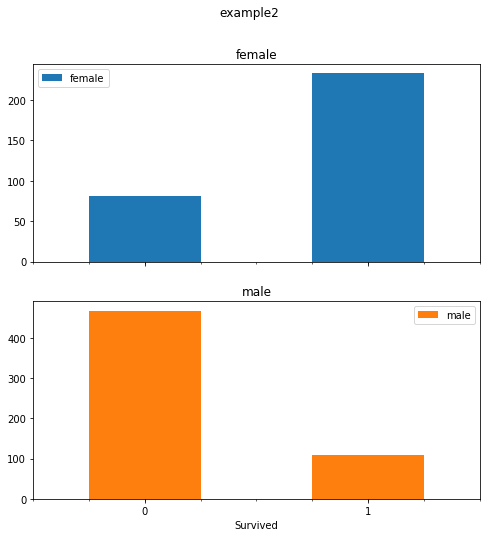

In [87]:
result2.plot(kind='bar', rot=0, title='example2', subplots=True, figsize=(8,8))